# 確率分布

## Contents

1. [1次元確率分布](#1)  
    1.1. [確率変数](#1.1)  
    1.2. [期待値と分散](#1.2)  
    1.3. [離散型分布の具体例](#1.3)  
    1.4. [連続型分布の具体例](#1.4)

2. [多次元確率分布](#2)  
    2.1. [期待値と分散](#2.1)  
    2.2. [周辺分布と条件付き分布](#2.2)  
    2.3. [多変量正規分布](#2.3)

3. [時系列データ](#3)


<a id="1"></a>
## 1. 1次元

<a id="1.1"></a>
### 1.1. 確率変数

#### <u>例 1.1.1 (表の出た回数)</u>
　1枚のコインが存在し, そのコインを投げた際に表と裏のどちらかをし, 表と裏を示す確率は等しいものとする. そのコインを連続で5回投げた際に出た表の回数ごとに確率を計算すると以下の通りである.
 
<table>
    <tr>
        <td>表の回数 $X$</td>
        <td>$0$</td>
        <td>$1$</td>
        <td>$2$</td>
        <td>$3$</td>
        <td>$4$</td>
        <td>$5$</td>
    </tr>
    <tr>
        <td>確率 ${\rm P}(X)$</td>
        <td>$\frac{1}{32}$</td>
        <td>$\frac{5}{32}$</td>
        <td>$\frac{5}{16}$</td>
        <td>$\frac{5}{16}$</td>
        <td>$\frac{5}{32}$</td>
        <td>$\frac{1}{32}$</td>
    </tr>
</table>

この時, 「コインを投げた際に出た表の回数」という現象を割り当てられた表の回数 $X$ のことを **確率変数** (random variable) という. また確率変数ごとに割り当てられた確率全体を表したものを **確率分布** (probability distribution) という.

#### <u>定義 1.1.2 (離散型確率分布)</u>

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$\{x_1, x_2, \cdots, x_m, m \in \mathbb{N}\}$ の中の値をとる確率変数 $X$ を**離散型** (discrete type) と呼び, それぞれの値の確率

$$
    {\rm P}(X = x_k) = f(x_k) \label{1.1}\tag{1.1}
$$

を $X$ の**確率分布** (probability distribution) という. $f$ は

<a id="math-1.2"></a>
<a id="math-1.3"></a>
$$
    \begin{align}
        & f(x_k) \geq 0 \quad (k = 1, 2, \cdots) \label{1.2}\tag{1.2} \\
        & \sum_{ k=0 }^{ n }{ f(x_k) } = 1 \label{1.3}\tag{1.3}
    \end{align}
$$

の条件を満たす. この $f$ を**確率質量関数** (probability mass function, pmf) という.
</div>

#### <u>定義 1.1.3 (連続型確率分布)</u>

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　確率変数 $X$ が連続値を取る場合, **連続型** (continuous type) と呼び, 取りうる区間で確率分布が定義される.

$$
    {\rm P}(a \leq X \leq b) = \int_{a}^{b}{f(x)dx} \label{1.4}\tag{1.4}
$$

$f$ は,

$$
    \begin{align}
        & f(x_k) \geq 0 \quad (x \in \mathbb{R}) \label{1.5}\tag{1.5} \\
        & \int_{- \infty}^{\infty}{f(x)dx} = 1 \label{1.6}\tag{1.6}
    \end{align}
$$

であるものとする. この $f$ を $X$ の**確率密度関数** (probability density function, pdf) という.

</div>

#### <u>定義 1.1.4 (累積分布関数)</u>

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　確率変数 $X$ に対して, $x$ を実数とするとき $x$ 以下の確率

$$
    F(x) = {\rm P}(X \geq x) \label{1.7}\tag{1.7}
$$

を $X$ の**累積分布関数** (cumulative distribution function, cdf) と呼ぶ.

</div>

#### <u>例 1.1.5 (離散型・連続型それぞれの累積分布関数)</u>

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　離散型の確率変数の場合, 確率質量関数 $f(x)$ を用いて $-\infty$ から $x$ までの積み上げたものとなり以下のように書ける.

$$
    F(x) = \sum_{u \geq x}{f(u)} \label{1.8}\tag{1.8}
$$

　また, 連続型の確率変数の場合, 確率密度関数 $f(x)$ を用いて
 
$$
    F(x) = \int_{-\infty}^{x}{f(u)du} \label{1.9}\tag{1.9}
$$

となる. また, 微分積分学の基本定理より $F(x)$ から密度関数 $f(x)$ が求められる.

$$
    F'(x) = \frac{d}{dx} \int_{-\infty}^{x}{f(u)du} = f(x) \label{1.10}\tag{1.10}
$$

</div>

#### <u>例 1.1.6 (pythonで離散型累積分布関数の確認)</u>

　例 1.1.1 で挙げたコインの表の回数に関する分布を再考する. 表の出る回数を $x (x = 0,1, \cdots, 5)$ とした時に $f(x) = {\rm P}(X=x)$ は以下のように書ける.

$$
    f(x) = {}_5{\rm C}_{5-x} \biggl( \frac{1}{2} \biggr)^x \biggl( 1-\frac{1}{2} \biggr)^{5-x} = {}_5{\rm C}_{5-x} \biggl( \frac{1}{2} \biggr)^5 = \frac{{}_5{\rm C}_{5-x}}{32} \label{1.11}\tag{1.11}
$$

後述するが, この確率質量関数によって表現される分布を**二項分布** (binomial distribution) といい, python の [SciPy](https://docs.scipy.org/doc/scipy/index.html) にある [`scipy.stats.binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) を用いて分布に従った確率変数を生成できる.

二項分布の確率
SciPy: 0.31249999999999983
理論値: 0.3125
差分: 1.6653345369377348e-16

二項分布の確率質量関数と累積分布関数


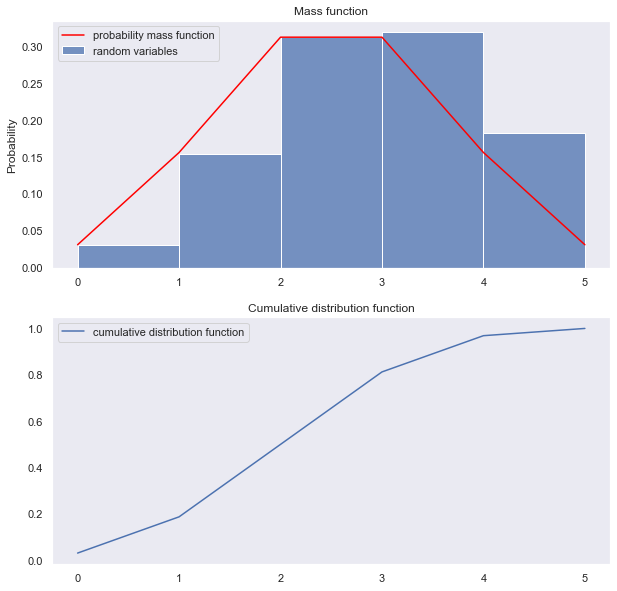

In [1]:
# 必要なモジュールのインポート.
%matplotlib inline

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 表が出る確率 p = 0.5 のコインを n = 5回投げるものとする.
p, n = 0.5, 5

# 表が2回出る確率を求める (理論値は 5/16).
# SciPy は疑似乱数から分布を生成しているが理論値とほとんど一致していることが分かる.
prob_2 = binom.pmf(n=n, p=p, k=2)

print("======================================")
print("二項分布の確率")
print("======================================")
print(f"SciPy: {prob_2}")
print(f"理論値: {5/16}")
print(f"差分: {5/16 - prob_2}")

# 二項分布に従う乱数列の生成
# 「表が出る確率 p = 0.5 のコインを n = 5回投げる」分布に従った疑似乱数を size=10000 個生成する.
size = 10000
np.random.seed(1)
rvs = binom.rvs(n=n, p=p, size=size)

# 確率分布を取得してプロットするため, 回数を表す横軸 (x) とそれに対応する確率質量関数の値 (y) を取得する.
x = np.arange(0, 6, 1)
y = binom.pmf(n=n, p=p, k=x)

# 可視化
print("")
print("======================================")
print("二項分布の確率質量関数と累積分布関数")
print("======================================")
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
sns.histplot(rvs, bins=x, stat="probability", kde=False, label="random variables", ax=ax1)
ax1.plot(x, y, label="probability mass function", color="red")
ax1.set_xticks(x)
ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

# 累積分布関数
cdf = binom.cdf(n=n, p=p, k=x)

ax2 = fig.add_subplot(212)
ax2.plot(x, cdf, label="cumulative distribution function")
ax2.set_xticks(x)
ax2.set_title("Cumulative distribution function")
ax2.legend()
ax2.grid()

#### <u>例 1.1.7 (pythonで連続型累積分布関数の確認)</u>

　連続型の確率分布で最も有名な**正規分布** (normal distribution, ガウス分布 \<Gaussina distribution\> とも呼ばれる) について考える.  
　日本の17歳男子の身長の平均は170.7 cmで, その標準偏差が5.8の正規分布に従うとされており, ここでは簡単なために平均値 $\mu=170$, 標準偏差 $\sigma=6$ として考える. この時, 以下の確率密度関数で表現することができる.

$$
    f(x) = \frac{1}{\sqrt{2 \pi \cdot 6^2 }} \exp{ \biggl( - \frac{(x-170)^2}{2 \cdot 6^2} \biggr) } \label{1.12}\tag{1.12}
$$

これは [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) によって正規分布に従った乱数を生成できる.


正規分布の確率質量関数と累積分布関数


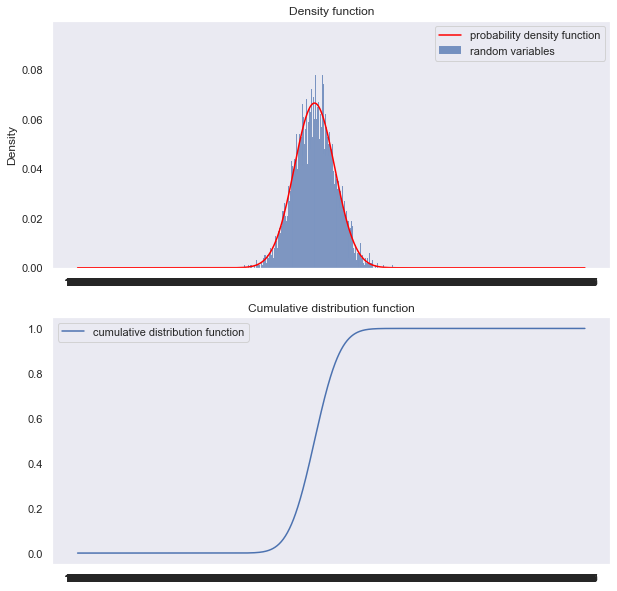

In [2]:
# 正規分布擬似乱数生成のクラスをインポートする.
from scipy.stats import norm

# 正規分布に従う乱数列の生成
loc = 170
scale = 6
size = 10000
rvs = norm.rvs(loc=loc, scale=scale, size=size)

# 確率分布を取得してプロットするため, 回数を表す横軸 (x) とそれに対応する確率質量関数の値 (y) を取得する.
x = np.arange(100, 250, 0.1)
y = norm.pdf(x=x, loc=loc, scale=scale)

# 可視化
print("")
print("======================================")
print("正規分布の確率質量関数と累積分布関数")
print("======================================")
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
sns.histplot(rvs, bins=x, stat="density", kde=False, label="random variables", ax=ax1)
ax1.plot(x, y, label="probability density function", color="red")
ax1.set_xticks(x)
ax1.set_title("Density function")
ax1.legend()
ax1.grid()

# 累積分布関数
cdf = norm.cdf(x=x, loc=loc, scale=scale)

ax2 = fig.add_subplot(212)
ax2.plot(x, cdf, label="cumulative distribution function")
ax2.set_xticks(x)
ax2.set_title("Cumulative distribution function")
ax2.legend()
ax2.grid()

<a id="1.2"></a>
### 1.2. 期待値と分散

#### <u>定義 1.2.1 (期待値)</u>

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　確率変数 $X$ に対して ${\rm E}(X)$ を**期待値** (expectation) といい

<a id="math-1.13"></a>
<a id="math-1.14"></a>

$$
    \begin{align}
        &(離散型) \quad {\rm E}(X) = \sum_{ x }{ xf(x) } \label{1.13}\tag{1.13} \\
        &(連続型) \quad {\rm E}(X) = \int_{ -\infty }^{ \infty }{ xf(x)dx } \label{1.14}\tag{1.14}
    \end{align}
$$

と書ける. ただし $f$ は離散型の場合は確率質量関数, 連続型の場合は確率密度関数を示す.
　また, $X$ の関数 $\phi(X)$ についても同様に期待値は定義でき以下の通りである.

$$
    \begin{align}
        &(離散型) \quad {\rm E}(X) = \sum_{ x }{ \phi(x)f(x) } \label{1.15}\tag{1.15} \\
        &(連続型) \quad {\rm E}(X) = \int_{ -\infty }^{ \infty }{ \phi(x)f(x)dx } \label{1.16}\tag{1.16}
    \end{align}
$$

</div>

#### <u>例 1.2.2 (期待値の具体例)</u>

　例 1.1.1 のケースの期待値の計算は以下の通りとなる.
 
$$
    {\rm E}(X) = 0 \times \frac{1}{32} + 1 \times \frac{5}{32} + 2 \times \frac{10}{32} + 3 \times \frac{10}{32} + 4 \times \frac{5}{32} + 5 \times \frac{1}{32} = \frac{5}{2} \label{1.17}\tag{1.17}
$$

　また連続型の分布のうち指数分布があり

$$
    f(x) = 
    \begin{cases}
        \lambda e^{-\lambda x} & (x \geq 0) \\
        0 & (x \le 0)
    \end{cases} \label{1.18}\tag{1.18}
$$

と書ける. ただし $\lambda > 0$ である. この時の期待値は

$$
    \begin{align}
        {\rm E}(X) 
            &= \int_{ -\infty }^{ 0 }{ x \cdot 0dx} + \int_{ 0 }^{ \infty }{ x \lambda e^{-\lambda x} dx} \\
            &= 0 + \int_{ 0 }^{ \infty }{ \lambda e^{-\lambda x} dx} - \frac{1}{ \lambda } \Bigl[ x \lambda e^{-\lambda x} \Bigr]_{0}^{ \infty } \\
            &= - \frac{1}{\lambda} \Bigl[ \lambda e^{-\lambda x} \Bigr]_{0}^{ \infty } \\
            &= \frac{1}{\lambda} \label{1.19}\tag{1.19}
    \end{align}
$$

となる. 計算には部分積分を用いて実施した. ([WolframAlpha](https://ja.wolframalpha.com/input?i2d=true&i=Integrate%5BxλExp%5B-λx%5D%2C%7Bx%2C0%2C∞%7D%5D) を用いると上の結果はすぐに導ける.)

#### <u>命題 1.2.3 (期待値の性質)</u>

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　期待値の演算について確率変数 $X, Y$ について以下の性質が成立する. ただし, $c$ は定数とする.

<a id="math-1.20"></a>

$$
    \begin{align}
        & {\rm E}(c) = c \label{1.20a}\tag{1.20a} \\
        & {\rm E}(X + c) = {\rm E}(X) + c \label{1.20b}\tag{1.20b} \\
        & {\rm E}(cX) = c{\rm E}(X) \label{1.20c}\tag{1.20c} \\
        & {\rm E}(X + Y) = {\rm E}(X) + {\rm E}(Y) \label{1.20d}\tag{1.20d}
    \end{align}
$$

</div>

#### <u>定義 1.2.4 (分散)</u>

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　確率変数 $X$ に対して ${\rm Var}(X)$ を**分散** (variance) といい

$$
    \begin{align}
        &(離散型) \quad {\rm Var}(X) = \sum_{ x }{ (x - {\rm E}(X))^2f(x) } \label{1.21}\tag{1.21} \\
        &(連続型) \quad {\rm Var}(X) = \int_{ -\infty }^{ \infty }{ (x - {\rm E}(X))^2f(x)dx } \label{1.22}\tag{1.22}
    \end{align}
$$

</div>

ただし, 実際に分散を求める際には以下の等式を利用する方が楽である.

#### <u>命題 1.2.5 (分散と期待値の関係式)</u>

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　分散と期待値の間には以下の関係が成立する.

<a id="math-1.23"></a>

$$
    \begin{align}
        {\rm Var}(X) = {\rm E}(X^2) - ({\rm E}(X))^2 \label{1.23}\tag{1.23}
    \end{align}
$$

</div>

<u>証明</u>

　離散型, 連続型いずれにおいても

$$
{\rm Var}(X) = {\rm E}(X^2) - 2({\rm E}(X))^2 + ({\rm E}(X))^2 = {\rm E}(X^2) - ({\rm E}(X))^2
$$

と計算できる.

#### <u>命題 1.2.6 (分散の性質)</u>

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　分散の演算について確率変数 $X$ について以下の性質が成立する. ただし, $c$ は定数とする.

$$
    \begin{align}
        & {\rm Var}(c) = 0 \label{1.24a}\tag{1.24a} \\
        & {\rm Var}(X + c) = {\rm Var}(X) \label{1.24b}\tag{1.24b} \\
        & {\rm Var}(cX) = c^2{\rm Var}(X) \label{1.24c}\tag{1.24c}
    \end{align}
$$

</div>

<a id="1.3"></a>
### 1.3. 離散型分布の具体例

#### <u>例 1.3.1 (ベルヌーイ分布)</u>

　**ベルヌーイ分布** (Bernoulli distribution) コインの裏表のように2種類の可能な結果 (成功を S, 失敗を F) を生じる試行 (**ベルヌーイ試行** (Bernoulli trials) と言う) に対する確率分布.

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

##### <u>確率質量関数</u>

　成功 S が起きる確率を $p$ とした場合, 確率変数 $X$ について成功 S の時に $X=1$, 失敗 F の時に $X = 0$ とする. この時の確率質量関数は以下の通り.

$$
    f(x) = p^x(1-p)^{1-x}
$$

</div>

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

##### <u>期待値と分散</u>

$$
    \begin{align}
        & {\rm E}(X) = p \\
        & {\rm Var}(X) = p(1-p)
    \end{align}
$$

</div>

##### <u>python での擬似乱数生成</u>

　[`scipy.stats.bernoulli`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli) を用いて生成する.

ベルヌーイ分布・擬似乱数
[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0]

ベルヌーイ分布・期待値/分散
期待値(乱数 vs 真値): 0.30029 vs 0.3
分散(乱数 vs 真値): 0.21011591590000003 vs 0.21

ベルヌーイ分布


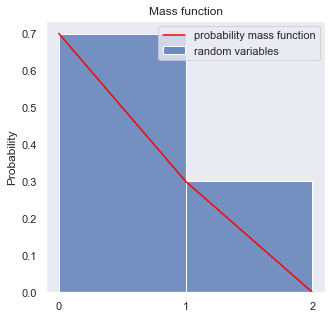

In [3]:
%matplotlib inline

from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 成功確率 p = 0.3 のベルヌーイ分布に従った疑似乱数を size = 100000 だけ生成する.
p = 0.3
size = 100000
rvs = bernoulli.rvs(p=p, size=size)

print("=========================================")
print("ベルヌーイ分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)

# 期待値・分散の理論値
exp_true = bernoulli.mean(p=p)
var_true = bernoulli.var(p=p)

print("")
print("=========================================")
print("ベルヌーイ分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

# 可視化
print("")
print("======================================")
print("ベルヌーイ分布")
print("======================================")

# 理想PMF
x = np.arange(0, 3, 1)
y = bernoulli.pmf(k=x, p=p)

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
sns.histplot(rvs, bins=x, stat="probability", kde=False, label="random variables", ax=ax1)
ax1.plot(x, y, label="probability mass function", color="red")
ax1.set_xticks(x)
ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

##### <u>ユースケース</u>

　単独で使用することはあまりないが, 統計モデルの一部にベルヌーイ分布を仮定することが多い. 現象が2パターンしか取り得ないような「会員登録の実施有無」, 「レビュー記事に対して高評価をするかしないか」, 「購買行動を行うか否か」にベルヌーイ分布を仮定する.
 
- 商品レビューが有用かどうか ([柴田と伊東, 2019](https://www.jstage.jst.go.jp/article/jsaikbs/118/0/118_05/_pdf). この論文内ではベルヌーイ分布による評価の代替評価を提案している.)
- ECサイト利用者に対して施策を売った際にどういったセグメントグループに効果的に機能したかを推定するモデル内において, セグメントグループの購買有無に対してベルヌーイ分布を仮定 ([松嵜ら, 2017](https://ipsj.ixsq.nii.ac.jp/ej/?action=repository_action_common_download&item_id=185104&item_no=1&attribute_id=1&file_no=1))

#### <u>例 1.3.2 (二項分布)</u>

　**二項分布** (binomial distribution) は結果が 2 つの試行 (成功を S, 失敗を F) を何度も繰り返すことによって起こる確率分布.

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

##### <u>確率質量関数</u>

　S が 確率 $p (0 \leq p \leq 1)$ で $x$ 回, F が確率 $1-p$ で $n-x$ 回生じるとすると, $x=0,1, \cdots, n$ であって, その確率質量関数は以下の通り.

$$
    f(x) = {}_n{\rm C}_{x} p^x (1-p)^{n-x}
$$

</div>

確率変数 $X$ が 二項分布に従っていることを $X \sim Bi(n, p)$ と記載する.

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

##### <u>期待値と分散</u>

$$
    \begin{align}
        & {\rm E}(X) = np \\
        & {\rm Var}(X) = np(1-p)
    \end{align}
$$

</div>

##### <u>python での擬似乱数生成</u>

　[`scipy.stats.binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) を用いて生成する.

二項分布・擬似乱数
[1 2 0 2 1 1 5 3 4 1 2 4 4 1 0 3 3 4 2 2 3 4 1 4 5 4 4 1 4 4 1 2 5 3 3 2 2
 4 3 4 0 3 5 2 4 6 2 3 2 3 3 2 4 2 2 8 1 3 1 4 1 2 1 4 2 2 3 4 2 2 3 4 1 4
 6 0 5 1 4 3 3 1 4 8 4 5 4 1 5 5 3 2 3 1 5 3 4 3 5 4]

二項分布・期待値/分散
期待値(乱数 vs 真値): 2.99594 vs 3.0
分散(乱数 vs 真値): 2.0879035164 vs 2.0999999999999996

二項分布


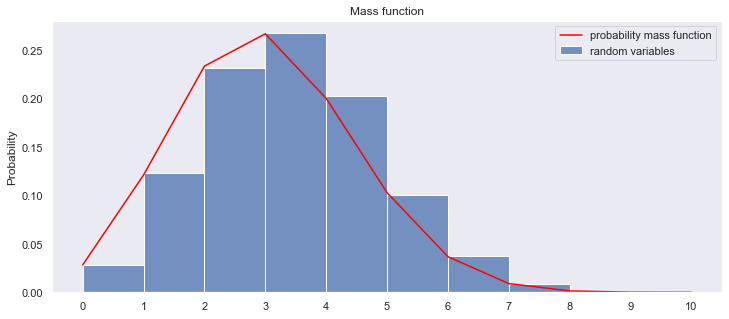

In [4]:
%matplotlib inline

from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 試行回数 n = 10, 成功確率 p = 0.3 の二項分布に従った疑似乱数を size = 100000 だけ生成する.
n = 10
p = 0.3
size = 100000
rvs = binom.rvs(n=n, p=p, size=size)

print("=========================================")
print("二項分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)

# 期待値・分散の理論値
exp_true = binom.mean(n=n, p=p)
var_true = binom.var(n=n, p=p)

print("")
print("=========================================")
print("二項分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

# 可視化
print("")
print("======================================")
print("二項分布")
print("======================================")

# 理想PMF
x = np.arange(0, 11, 1)
y = binom.pmf(k=x, n=n, p=p)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)
sns.histplot(rvs, bins=x, stat="probability", kde=False, label="random variables", ax=ax1)
ax1.plot(x, y, label="probability mass function", color="red")
ax1.set_xticks(x)
ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

##### <u>ユースケース</u>
 
- バナー広告のインプレッション数 $n$ 回のうち, クリック率 $p$ で広告がクリックされる回数 ([本橋ら, 2012](http://www.orsj.or.jp/archive2/or57-10/or57_10_574.pdf))
- 特定のサービスにおいて $n$ 人の利用ユーザーのうち, 確率 $p$ で解約する人数
- 特定の病気において $n$ 人の被験者のうち, 病気の発症率 $p$ がどのように変わるか

#### <u>例 1.3.3 (ポアソン分布)</u>

　**ポアソン分布** (Poisson distribution) とは, 二項分布において $n$ が大 (すなわち大量の観測) である一方, $p$ が小 (すなわち希少現象) である分布.

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">
    
##### <u>確率質量関数</u>

　$\lambda > 0, x \geq 0$ として確率質量関数は以下の通り.

$$
    f(x) = \frac{e^{-\lambda} \lambda^{x}}{x!}
$$

</div>

ここで確率分布の性質である [(1.2)](#math-1.2), [(1.3)](#math-1.3) を確認する.

<u>数式 (1.2) の確認</u>  
　確率質量関数の定義から $f(x) \geq 0$ であることは自明.

<u>数式 (1.3) の確認</u>  
　$e^x$ について[マクローリン展開](https://ja.wikipedia.org/wiki/テイラー展開)から

$$
    \begin{align}
        e^x &= 1 + \frac{x}{1!} + \frac{x^2}{2!} + \cdots + \frac{x^k}{k!} + \cdots \\
            &= \sum_{k=0}^{\infty}{\frac{x^k}{k!}}
    \end{align}
$$

と書けるので,

$$
\sum_{x=0}^{\infty}{f(x)} = \sum_{x=0}^{\infty}{\frac{e^{-\lambda} \lambda^{x}}{x!}} = e^{-\lambda} \sum_{x=0}^{\infty}{\frac{ \lambda^{x}}{x!}} = e^{-\lambda} \cdot e^{\lambda} = 1
$$

と分かる.  

　確率変数 $X$ がポアソン分布に従う時, $X \sim Po(\lambda)$ または $X \sim Poisson(\lambda)$ と記載する.

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">
    
##### <u>期待値と分散</u>

$$
    \begin{align}
        & {\rm E}(X) = \lambda \\
        & {\rm Var}(X) = \lambda
    \end{align}
$$

</div>

<u>証明</u>  
　期待値については, 式 [(1.13)](#math-1.13) より

$$
    \begin{align}
        {\rm E}(X) &= \sum_{x=0}^{\infty}{x\frac{e^{-\lambda}\lambda^{x}}{x!}} \\
                   &= \lambda e^{-\lambda}\sum_{x=1}^{\infty}{\frac{\lambda^{x-1}}{(x-1)!}} \\
                   &= \lambda e^{-\lambda} \cdot e^{\lambda} \\
                   &= \lambda
    \end{align}
$$

と計算できる. また分散について式 [(1.23)](#math-1.23) から ${\rm E}(X^2)$ を求めることで分散も求められる.

$$
    \begin{align}
        {\rm E}(X^2) &= \sum_{x=0}^{\infty}{x^2\frac{e^{-\lambda}\lambda^{x}}{x!}} \\
                     &= \sum_{x=0}^{\infty}{\{x(x-1) + x\} \frac{e^{-\lambda}\lambda^{x}}{x!}} \\
                     &= \lambda^2 e^{-\lambda}\sum_{x=2}^{\infty}{\frac{\lambda^{x-2}}{(x-2)!}} + \lambda e^{-\lambda}\sum_{x=1}^{\infty}{\frac{\lambda^{x-1}}{(x-1)!}} \\
                     &= \lambda^2 + \lambda \\
    \end{align}
$$

よって

$$
    {\rm Var}(X) = {\rm}E(X^2) - ({\rm E}(X))^2 = \lambda^2 + \lambda - \lambda^2 = \lambda
$$

##### <u>python での擬似乱数生成</u>

　[`scipy.stats.poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson) を用いて生成する.

ポアソン分布・擬似乱数
[2 2 1 0 2 0 2 5 1 2 3 1 1 1 0 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 0 2 1 0 0 2
 2 0 2 0 0 0 1 0 1 2 1 2 1 3 1 1 1 1 0 1 1 1 0 0 0 2 1 2 1 1 1 0 0 1 2 2 2
 0 1 0 0 0 0 2 0 0 2 1 2 3 3 2 2 0 0 0 1 2 1 0 2 1 0]

ポアソン分布・期待値/分散
期待値(乱数 vs 真値): 1.00269 vs 1.0
分散(乱数 vs 真値): 1.0003427639 vs 1.0

ポアソン分布


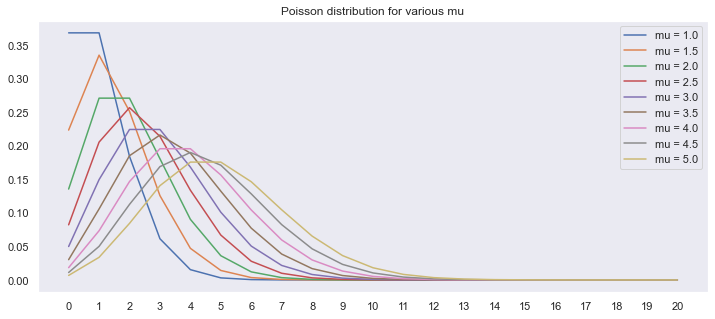

In [5]:
%matplotlib inline

from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# mu (上式のlambdaに相当) = 1 のポアソン分布に従った疑似乱数を size = 100000 だけ生成する.
mu = 1
size = 100000
rvs = poisson.rvs(mu=mu, size=size)

print("=========================================")
print("ポアソン分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)

# 期待値・分散の理論値
exp_true = poisson.mean(mu=mu)
var_true = poisson.var(mu=mu)

print("")
print("=========================================")
print("ポアソン分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

# 可視化
print("")
print("======================================")
print("ポアソン分布")
print("======================================")

# x軸
x = np.arange(0, 21, 1)

# 図の定義
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)

for mu in np.arange(1.0, 5.5, 0.5):
    y = poisson.pmf(k=x, mu=mu)
    label = f"mu = {mu}"
    ax1.plot(x, y, label=label)
    
ax1.set_xticks(x)
ax1.set_title("Poisson distribution for various mu")
ax1.legend()
ax1.grid()

　二項分布において $n \rightarrow \infty, p \rightarrow 0$ とすることでポアソン分布に近づく. ここで $\lambda = np$ とすれば確率質量関数 $f(x)$ は

$$
    \begin{align}
        f(x) &= {}_n{\rm C}_{x} \Bigl( \frac{\lambda}{n} \Bigr)^x \Bigl( 1 - \frac{\lambda}{n} \Bigr)^{n-x} \\
             &= \frac{n(n-1) \cdots (n-x+1)}{x!} \frac{\lambda^x}{n^x} \Bigl( 1 - \frac{\lambda}{n} \Bigr)^n \Bigl( 1 - \frac{\lambda}{n} \Bigr)^{-x} \\
             &= \frac{\lambda^x}{x!} \Bigl( 1 - \frac{\lambda}{n} \Bigr)^n \Bigl( 1 - \frac{1}{n} \Bigr) \Bigl( 1 - \frac{2}{n} \Bigr) \cdots \Bigl( 1 - \frac{k-1}{n} \Bigr) \Bigl( 1 - \frac{\lambda}{n} \Bigr)^{-x}
    \end{align}
$$

ここで, $n \rightarrow \infty$ とした時, $m = 1, 2, \cdots, k-1$ とすれば

$$
\lim_{n \rightarrow \infty}{\Bigl( 1 - \frac{m}{n} \Bigr)} = 0, \quad \lim_{n \rightarrow \infty}{\Bigl( 1 - \frac{\lambda}{n} \Bigr)^{-x}} = 0 \quad \lim_{n \rightarrow \infty}{\Bigl( 1 - \frac{\lambda}{n} \Bigr)^n} = e^{-\lambda}
$$

なので,

$$
    \lim_{n \rightarrow \infty}{f(x)} = \frac{e^{-\lambda} \lambda^{x}}{x!}
$$

とポアソン分布になる. 実際に python で二項分布とポアソン分布を比較する.

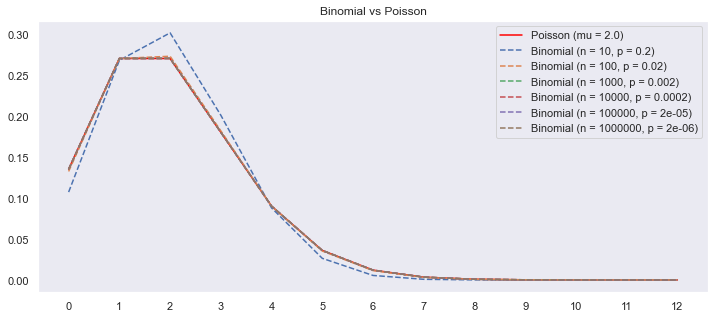

In [6]:
%matplotlib inline

from scipy.stats import binom, poisson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# x軸
x = np.arange(0, 13, 1)

# 図の定義
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)

# ポアソン分布
y = poisson.pmf(k=x, mu=2.0)
label = f"Poisson (mu = 2.0)"
ax1.plot(x, y, color="red", label=label)

# 二項分布
scales = np.array([1, 10, 100, 1000, 10000, 100000])
base_n = 10
base_p = 0.2
for scale in scales:
    n = base_n * scale
    p = base_p / scale
    y = binom.pmf(k=x, n=n, p=p)
    label = f"Binomial (n = {n}, p = {p})"
    ax1.plot(x, y, linestyle="dashed", label=label)
    
ax1.set_xticks(x)
ax1.set_title("Binomial vs Poisson")
ax1.legend()
ax1.grid()

##### <u>ユースケース</u>
- 交通事故件数
- 大量生産の不良品数 ([pyISC Example: Simple Anomaly Detection with Frequency Data](https://notebook.community/STREAM3/pyisc/docs/pyISC_simple_anomaly_example))
- 破産件数
- 火災件数
- 砲弾命中数
- 遺伝子の突然変異数
- 電話の呼び数
- 渋滞していない高速道路の料金ゲートへの車の到着台数
- 医学研究において顕微鏡視野に入る区画当たりのバクテリア数
- 物理現象として単位時間当たりのガイガー計数管の読み数

#### <u>例 1.3.4 (幾何分布)</u>

　成功 S (発生確率 $p$) と失敗 F (発生確率 $q = 1- p$) の 2 通りしかない試行を次々と続ける試行を考える. 最初の成功 S が出現するまでの試行回数を $x$ とするならば $x = 1, 2, 3, \cdots$ であり以下の確率質量関数で表現される確率分布を**幾何分布** (geometric distribution) という.

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

##### <u>確率質量関数</u>

　$0 \lt p \lt 1, q = 1 - p$ とする. 

$$
    f(x) = pq^{x-1} \quad (x = 1, 2, 3, \cdots)
$$

</div>

これは $x$ に応じて幾何級数 (等比数列) 的に減じていくため幾何分布という.  
　ここで確率分布の性質である [(1.2)](#math-1.2), [(1.3)](#math-1.3) を確認する.

<u>数式 (1.2) の確認</u>  
　確率質量関数の定義から $f(x) \geq 0$ であることは自明.

<u>数式 (1.3) の確認</u>  

　$0 \lt p \lt 1 \Rightarrow 0 \lt q \lt 1$ なので無限等比級数の和から

$$
\sum_{x=1}^{\infty}{f(x)} = p\sum_{x=1}^{\infty}{q} = p \cdot \frac{1}{1-q} = p \cdot \frac{1}{p} = 1
$$

と分かる.  

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">
    
##### <u>期待値と分散</u>

$$
    \begin{align}
        & {\rm E}(X) = \frac{1}{p} \\
        & {\rm Var}(X) = \frac{q}{p^2}
    \end{align}
$$

</div>

<u>証明</u>  
　期待値については, 式 [(1.13)](#math-1.13) より

$$
    \begin{align}
        {\rm E}(X) = \sum_{x=1}^{\infty}{x pq^{x-1}} = p \sum_{x=1}^{\infty}{ xq^{x-1} }
    \end{align}
$$

$0 \lt q \lt 1$ において

$$
    g(q) = \sum_{x = 0}^{\infty}{q^x} = \frac{1}{1-q}
$$

を考える. 第 3 項については無限等比級数の和から分かる. $q$ について微分すると

$$
    g'(q) = \sum_{x = 1}^{\infty}{xq^{x-1}} = \frac{1}{(1-q)^2}
$$

となり $p = 1 - q$ であることに注意して,

$$
    {\rm E}(X) = p \sum_{x=1}^{\infty}{ xq^{x-1} } = p \cdot \frac{1}{(1-q)^2} = \frac{1}{p}
$$

と求められる. また分散については [(1.23)](#math-1.23) より

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)+X) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2
    \end{align}
$$

第 2 式から弟 3 式への変換は性質 [(1.20d)](#math-1.20) を用いている.
　${\rm}E(X(X-1))$ を求めれば分散が求められる. 上で用いた $g(q)$ を 2 階微分すると

$$
    g''(q) = \sum_{x = 2}^{\infty}{x(x-1)q^{x-2}} = \frac{2}{(1-q)^3}
$$

なので

$$
    {\rm E}(X(X-1)) = pq \sum_{x=2}^{\infty}{ x(x-1)q^{x-2} } = pq \frac{2}{(1-q)^3} = \frac{2(1-q)}{p^2}
$$

となり分散は

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2 \\
                     &= \frac{2(1-q)}{p^2} + \frac{1}{p} - \frac{1}{p^2} \\
                     &= \frac{1-p}{p^2} \\
                     &= \frac{q}{p^2}
    \end{align}
$$

と分かる.

##### <u>python での擬似乱数生成</u>

　[`scipy.stats.geom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom) を用いて生成する.

幾何分布・擬似乱数
[ 12  10  25   2  53  68  22   5  32  35  47   3   3  68   7  11  24 101
   5 114  26  16  10  44   5  60  13   2   1 137  11  13   4  11  44  15
  21  34  10  33  27  96  43  42  29   2   2  14   3  49  29  37  10   4
  24  84  18  39  44  10   8   7   4  20  30  10  29   2  45 100  10  18
  27  63   4  21   9  25   7  17  26  30  26  40  50  41  15  19  12   4
  56  12   2  23  10   2   2  51  88   7]

幾何分布・期待値/分散
期待値(乱数 vs 真値): 24.88497 vs 25.0
分散(乱数 vs 真値): 599.9549780991 vs 600.0
最大値 (乱数): 325
最小値 (乱数): 1

幾何分布


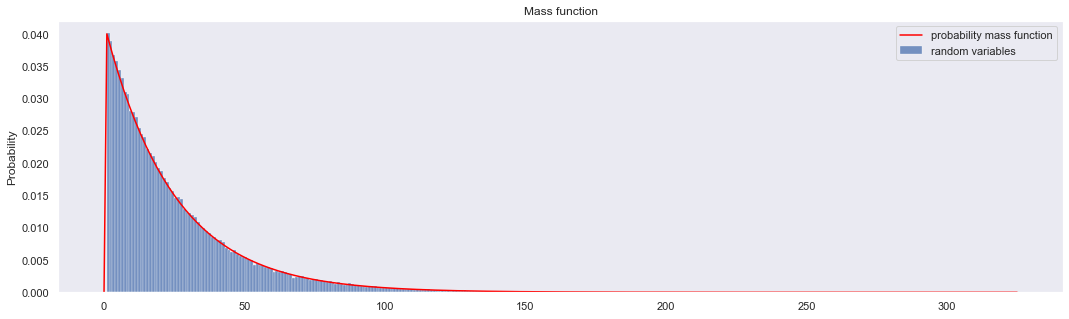

In [7]:
%matplotlib inline

from scipy.stats import geom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 成功確率 p = 0.04 の幾何分布に従った疑似乱数を size = 100000 だけ生成する.
p = 0.04
size = 100000
rvs = geom.rvs(p=p, size=size)

print("=========================================")
print("幾何分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)
max_rvs = np.max(rvs)
min_rvs = np.min(rvs)

# 期待値・分散の理論値
exp_true = geom.mean(p=p)
var_true = geom.var(p=p)

print("")
print("=========================================")
print("幾何分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")
print(f"最大値 (乱数): {max_rvs}")
print(f"最小値 (乱数): {min_rvs}")

# 可視化
print("")
print("======================================")
print("幾何分布")
print("======================================")

# x軸
x = np.arange(0, max_rvs + 1, 1)

# 図の定義
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(111)

# 乱数によるヒストグラム
sns.histplot(rvs, bins=x, stat="probability", kde=False, label="random variables", ax=ax1)

# 確率質量関数による真値
y = geom.pmf(k=x, p=p)
ax1.plot(x, y, color="red", label="probability mass function")

ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

##### <u>ユースケース</u>
 
- 1年について確率 $p$ で起こる災害が $x$ 年以内に発生する分布として捕捉.

#### <u>例 1.3.5 (負の二項分布)</u>

　**負の二項分布** (negative binomial distribution) は幾何分布を一般化されたものであり, $n$ 回目の成功を得るまでの失敗の回数を $x$ とした時の確率分布である.

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

##### <u>確率質量関数</u>

　$x = 0, 1, \cdots$ とする. 

$$
    f(x) = {}_{n+x-1}{\rm C}_{x} p^n q^x
$$

</div>

$n=1$ の時に幾何分布となる. ちなみに, 二項分布で二項係数に負も認めれば負の二項分布が求められるため, この名称となっている.  
　ここで確率分布の性質である [(1.2)](#math-1.2), [(1.3)](#math-1.3) を確認する.

<u>数式 (1.2) の確認</u>  
　確率質量関数の定義から $f(x) \geq 0$ であることは自明.

<u>数式 (1.3) の確認</u>  

　負の二項展開式について考えるとすぐに導出できる. $n \in \mathbb{N}$, $r$ $(0 \leq r \leq n, r \in \mathbb{N})$ として

$$
    (1 + t)^{-n} = \sum_{x=0}^{n}{{}_{-n}{\rm C}_{x}t^x}
$$

とかけ,

$$
    {}_{-n}{\rm C}_{x} = (-1)^x {}_{n+x-1}{\rm C}_{x}
$$

と表せる.
　$t = -(1-p)$ として
 
$$
    \frac{1}{p^n} = {1 -(1-p)}^{-n} = \sum_{x=0}^{\infty}{{}_{-n}{\rm C}_{x}(-(1-p))^x} = \sum_{x=0}^{\infty}{{}_{n+x-1}{\rm C}_{x}(1-p)^x}
$$

となるので, $q = 1 - p$ であり上式に $p^n$ をかけて

$$
    \sum_{x=0}^{\infty}{{}_{n+x-1}{\rm C}_{x}p^n q^x} = 1
$$

となる.

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">
    
##### <u>期待値と分散</u>

$$
    \begin{align}
        & {\rm E}(X) = \frac{nq}{p} \\
        & {\rm Var}(X) = \frac{nq}{p^2}
    \end{align}
$$

</div>

<u>証明</u>  
　期待値については, 式 [(1.13)](#math-1.13) より

$$
    \begin{align}
        {\rm E}(X) &= \sum_{x=0}^{\infty}{x {}_{ n+x-1 }{\rm C}_{ x } p^n q^x } \\
                   &= \sum_{x=1}^{\infty}{x \frac{ (n+x-1)! }{ (n-1)! x! } p^n q^x } \\
                   &= \sum_{x=1}^{\infty}{ \frac{ (n+x-1)! }{ (n-1)! (x-1)! } p^n q^x }
    \end{align}
$$

ここで $y = x - 1$, $N = n + 1$ と置換すると

$$
    \begin{align}
        {\rm E}(X) &= \sum_{y=0}^{\infty}{ \frac{ (y + N -1)! }{ ( N-2 )! y! } p^{ N-1 } q^{ y+1 } } \\
                   &= \frac{ q }{ p }(N-1) \sum_{y=0}^{\infty}{ \frac{ (y + N -1 )! }{ ( N-1 )! y! } p^{ N } q^{ y } } \\
                   &= \frac{ q }{ p }(N-1) \\
                   &= \frac{nq}{p}
    \end{align}
$$

と求められる. また分散については [(1.23)](#math-1.23) より

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)+X) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2
    \end{align}
$$

第 2 式から弟 3 式への変換は性質 [(1.20d)](#math-1.20) を用いている.  
　${\rm}E(X(X-1))$ を求めれば分散が求められるので,

$$
    \begin{align}
        {\rm E}(X(X-1)) &= \sum_{x=0}^{\infty}{ x(x-1) {}_{ n+x-1 }{\rm C}_{ x } p^n q^x } \\
                        &= \sum_{x=1}^{\infty}{ x(x-1) \frac{ (n+x-1)! }{ (n-1)! x! } p^n q^x } \\
                        &= \sum_{x=2}^{\infty}{ \frac{ (n+x-1)! }{ (n-1)! (x-2)! } p^n q^x }
    \end{align}
$$

となる. ここで $y = x - 2$, $N = n + 2$ と置換すると

$$
    \begin{align}
        {\rm E}(X(X-1)) &= \sum_{y=0}^{\infty}{ \frac{ (N + y - 1)! }{ (N - 3)! y! } p^{N - 2} q^{y + 2} } \\
                        &= \frac{q^2}{p^2}(N-1)(N-2) \sum_{y=0}^{\infty}{ \frac{ (N+y-1)! }{ (N-1)! y! } p^{N} q^{y} } \\
                        &= \frac{q^2}{p^2}(N-1)(N-2) \\
                        &= \frac{q^2}{p^2}n(n + 1)
    \end{align}
$$

となり分散は

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2 \\
                     &= \frac{q^2}{p^2}n(n + 1) + \frac{nq}{p} - \frac{n^2 q^2}{p^2} \\
                     &= \frac{nq}{p^2}
    \end{align}
$$

と分かる.

##### <u>python での擬似乱数生成</u>

　[`scipy.stats.nbinom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html#scipy.stats.nbinom) を用いて生成する.

負の二項分布・擬似乱数
[28 24 21 14  7 10 10 28  9 13  2 20  4 10 12 19 20 16 11  4 23 12 10 12
 17  5 10  9 15  7 21 17 13 21  5 11 19 17 22  4 34 25 41  3  9 13 10 15
 13  8 13 12 21  9  8  7 30 18 50 10 46 19 14 16 34 24 15  8 17 25 18 14
 28 22 18 16 14 18 14 28 14 30 22 56 11 15 32 10 17 19 23 12 21 17 26 13
 18 17 11  5]

負の二項分布・期待値/分散
期待値(乱数 vs 真値): 15.98008 vs 16.0
分散(乱数 vs 真値): 79.9489231936 vs 79.99999999999999
最大値 (乱数): 80
最小値 (乱数): 0

負の二項分布分布


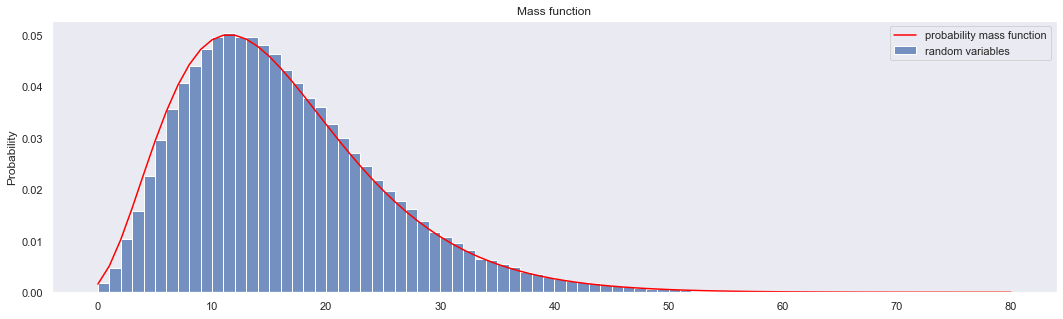

In [8]:
%matplotlib inline

from scipy.stats import nbinom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 成功確率 p = 0.20 の事象において n = 4 回成功するまでの失敗回数に関する負の二項分布に従った疑似乱数を size = 100000 だけ生成する.
n = 4
p = 0.20
size = 100000
rvs = nbinom.rvs(n=n, p=p, size=size)

print("=========================================")
print("負の二項分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)
max_rvs = np.max(rvs)
min_rvs = np.min(rvs)

# 期待値・分散の理論値
exp_true = nbinom.mean(n=n, p=p)
var_true = nbinom.var(n=n, p=p)

print("")
print("=========================================")
print("負の二項分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")
print(f"最大値 (乱数): {max_rvs}")
print(f"最小値 (乱数): {min_rvs}")

# 可視化
print("")
print("======================================")
print("負の二項分布分布")
print("======================================")

# x軸
x = np.arange(0, max_rvs + 1, 1)

# 図の定義
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(111)

# 乱数によるヒストグラム
sns.histplot(rvs, bins=x, stat="probability", kde=False, label="random variables", ax=ax1)

# 確率質量関数による真値
y = nbinom.pmf(k=x, n=n, p=p)
ax1.plot(x, y, color="red", label="probability mass function")

ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

##### <u>ユースケース</u>

- 購入頻度が負の二項分布に従う ([購買回数の分布と負の二項分布の関係](https://qiita.com/nijigen_plot/items/9570487b73ad01fff36b)).

<a id="1.4"></a>
### 1.4. 連続型分布の具体例

#### <u>例 1.4.1 (一様分布)</u>

#### <u>例 1.4.2 (正規分布)</u>

#### <u>例 1.4.3 (対数正規分布)</u>

#### <u>例 1.4.4 (指数分布)</u>

#### <u>例 1.4.5 (ベータ分布)</u>

#### <u>例 1.4.6 (コーシー分布)</u>

#### <u>例 1.4.7 (パレート分布)</u>

#### <u>例 1.4.8 (ワイブル分布)</u>

<a id="2"></a>
## 2. 多次元確率分布

XXXX

<a id="2.1"></a>
### 2.1. 期待値と分散

XXXX

<a id="2.2"></a>
### 2.2. 周辺分布と条件付き分布

XXXX

<a id="2.3"></a>
### 2.3. 多変量正規分布

XXXX

<a id="3"></a>
## 3. 時系列データ

XXXX